In [1]:
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings
import plotly.express as px

In [2]:
data = pd.read_csv('obesity-cleaned.csv')

In [3]:
data.shape

(24570, 5)

In [4]:
data.dtypes

Unnamed: 0      int64
Country        object
Year            int64
Obesity (%)    object
Sex            object
dtype: object

In [5]:
data.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

In [23]:
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

In [24]:
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data2.duplicated().sum()} duplicate rows. Also;")
    return exploration

In [17]:
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data2.columns = [column.lower().replace(' ', '_') for column in data.columns]


In [28]:
snake_columns(data)

In [41]:
data.columns

Index(['country', 'year', 'obesity_(%)', 'sex'], dtype='object')

In [42]:
data.dtypes

country         object
year             int64
obesity_(%)    float64
sex             object
dtype: object

In [31]:
data.dropna(inplace=True)

In [38]:
data.drop('unnamed:_0', axis=1, inplace=True)


In [39]:
explore_data(data)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
country,0,0
year,0,0
obesity_(%),0,0
sex,0,0


In [40]:
open_data(data)

Data shape is (24066, 4).

country         object
year             int64
obesity_(%)    float64
sex             object
dtype: object

Data row sample and full columns:


,country,year,obesity_(%),sex
22848,Uganda,1989,1.3,Both sexes
21181,Sweden,1979,8.0,Male
12649,Luxembourg,1991,12.0,Male
12496,Lithuania,1982,10.0,Male
2572,Bolivia (Plurinational State of),1992,5.7,Male


In [6]:
import pandas as pd

# Suponiendo que 'data' es tu DataFrame
data['Obesity (%)'] = data['Obesity (%)'].str.split('[', n=1).str[0]

# Convertir la columna 'Obesity (%)' a tipo numérico, ignorando los errores y convirtiendo a NaN
data['Obesity (%)'] = pd.to_numeric(data['Obesity (%)'], errors='coerce')


In [9]:
# Guardar la tabla en un archivo CSV
data.to_csv('data_obesity_tableau.csv', index=False)

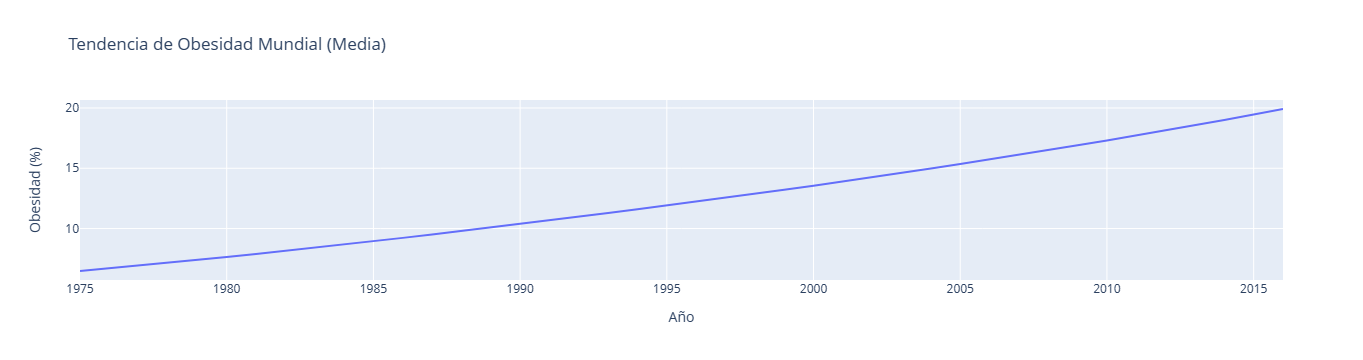

In [45]:
media_obesidad_global_por_año = data.groupby('year')['obesity_(%)'].mean().reset_index()

# Crear un gráfico interactivo de la tendencia de obesidad mundial a lo largo de los años
fig = px.line(media_obesidad_global_por_año, x='year', y='obesity_(%)', title='Tendencia de Obesidad Mundial (Media)')
fig.update_xaxes(title_text='Año')
fig.update_yaxes(title_text='Obesidad (%)')
fig.show()
fig.write_html("tendencia_obesidad.html")

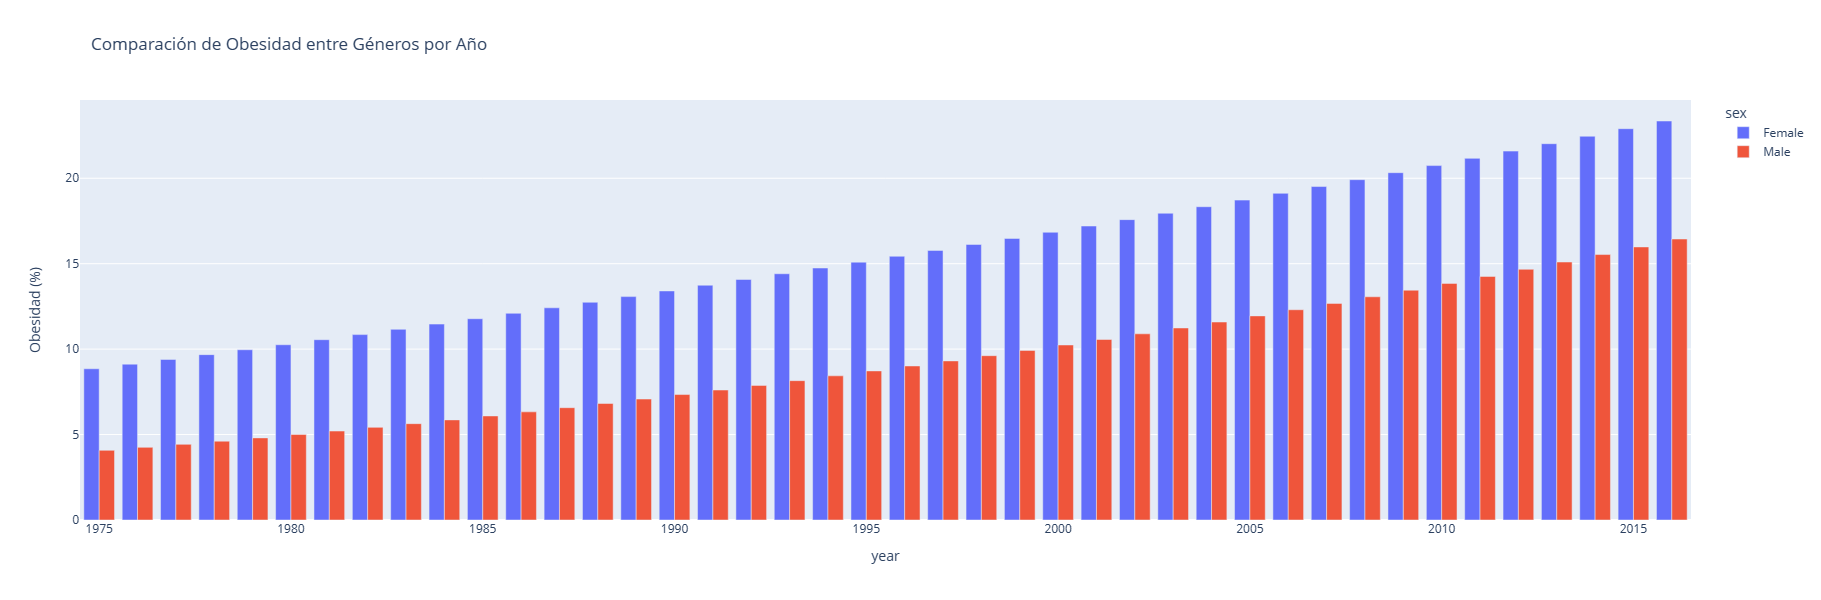

In [66]:
import matplotlib.pyplot as plt
data = data[data['sex'] != 'Both sexes']
# Calcular la media de obesidad por año y género
mean_obesity_by_year_gender = data.groupby(['year', 'sex'])['obesity_(%)'].mean().reset_index()

# Filtrar por género
female_data = mean_obesity_by_year_gender[mean_obesity_by_year_gender['sex'] == 'Female']
male_data = mean_obesity_by_year_gender[mean_obesity_by_year_gender['sex'] == 'Male']

# Crear el gráfico interactivo de barras con Plotly Express
fig3 = px.bar(mean_obesity_by_year_gender, 
             x='year', 
             y='obesity_(%)', 
             color='sex', 
             title='Comparación de Obesidad entre Géneros por Año',
             barmode='group',  # Agrupar las barras
             labels={'obesity_(%)': 'Obesidad (%)'},
             category_orders={'sex': ['Female', 'Male']},  # Ordenar las categorías de género
             width=800,  # Ancho del gráfico
             height=600  # Alto del gráfico
            )

# Mostrar el gráfico
fig3.show()

In [67]:
fig3.write_html("comparacion_obesidad_generos.html")

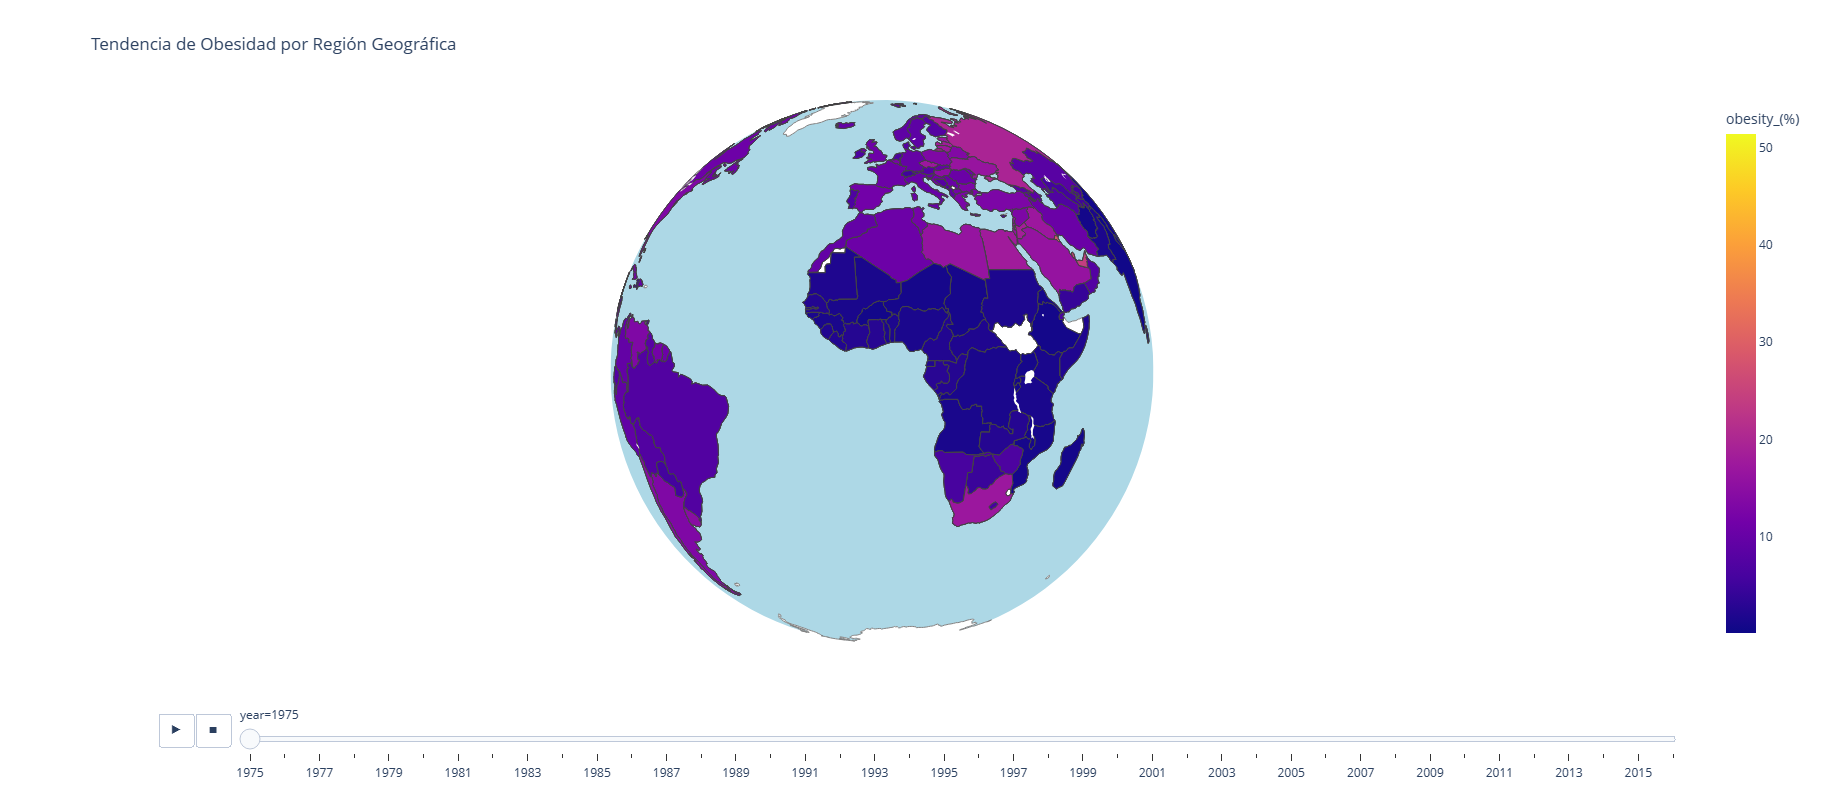

In [53]:
# Crear el gráfico interactivo
fig2 = px.choropleth(data, 
                    locations='country', 
                    locationmode='country names', 
                    color='obesity_(%)', 
                    hover_name='country', 
                    animation_frame='year', 
                    title='Tendencia de Obesidad por Región Geográfica',
                    projection='natural earth'  # Cambiar la proyección para un mejor aspecto
                   )

# Ajustar la apariencia del mapa
fig2.update_geos(projection_type='orthographic', 
                showcoastlines=True, 
                coastlinecolor="Gray", 
                showland=True, 
                landcolor="white",
                showocean=True, 
                oceancolor="LightBlue", 
                showframe=False)

# Personalizar el tamaño máximo de los marcadores
fig2.update_traces(marker=dict(sizemin=5, sizemode='area', size=max(5, data['obesity_(%)'].max()/10)), selector=dict(mode='markers'))

# Ajustar el tamaño total del gráfico
fig2.update_layout(width=1000, height=800)

# Mostrar el gráfico
fig2.show()

In [54]:
fig2.write_html("tendencia_obesidad2.html")